강의_6기_AI응용_1차시_03_OpenCV 영상의 읽기쓰기.ipynb

요약

실무 erode, dilate, open, close

blur, GausianBlur, medianBlur

cv2.GaussianBlur(이미지, 커널 사이즈, 표준편차)

cv2.blur(이미지, 커널크기)

cv2.threshold(img, thresh, maxval, type

데이터 유형, cv2.THRESH_BINARY,

cv2.erode(img, kernel, iterations=n)

cv2.dilate(img, kernel, iterations=n)

cv2.morphologyEx(img, cv.MORPH_OPEN, kernel)


In [ ]:
# opencv 설치
!pip install opencv-python

In [ ]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
image_path = '/content/drive/MyDrive/교육과정_두산로보틱스 로키 6기_250829/강의_4차_AI_Computer_Vision_응용_251120/1차시_OpenCV 영상정규화 및  Object Detecion 입문/mario.png'

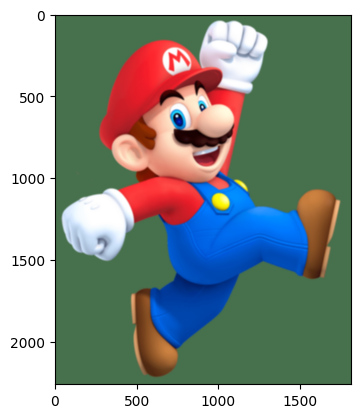

In [ ]:
image = cv2.imread(image_path)
src = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# blur(이미지, 커널크기)
dst = cv2.blur(src, (11, 11))
plt.imshow(dst)

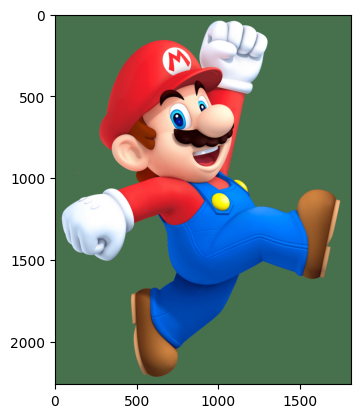

In [ ]:
dst = cv2.blur(src, (3, 3))
plt.imshow(src)

커널크기에 따라 blur 효과 달라짐
- 3*3 커널 : 약간 흐림
- 5*5 커널 : 중간 정도 흐림
- 11*11 커널 : 많이 흐림

왜 이런 일이?
- 작은커널(3*3) : 주변에 9개 픽셀의 평균
    - 가까운 픽셀만 영향받음
- 큰 커널(11*11) : 주변에 121개 픽셀의 평균
    - 멀리 있는 픽셀도 영향을 받음

-> 배경 지우기

다른 인물 지우기 : 작은 커널

모자이크 지우기 : 큰 커널

# 커널크기 규칙

- 홀수만 사용
- 실제 (3,3), (5,5), (7*7), (11, 11)
- 중앙값이 명확

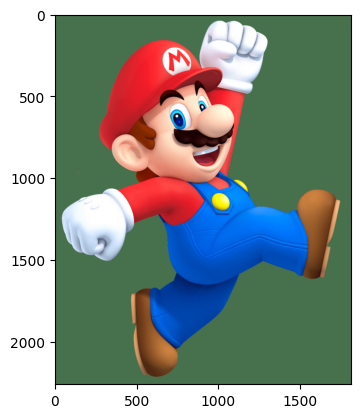

In [ ]:
# GaussianBlur()
# cv2.GaussianBlur(이미지, 커널 사이즈, 표준편차)
dst = cv2.GaussianBlur(src, ksize=(3,3), sigmaX=0)
plt.imshow(dst)

# blur는 모든 값에 동일한 가중치 부여
# GaussianBlur는 중심값에 맞게 가중치 부여
# #blur
# 1 1 1
# 1
# 1
# #Gausian
# 1 2 1
# 2 4 2
# 1 2 1

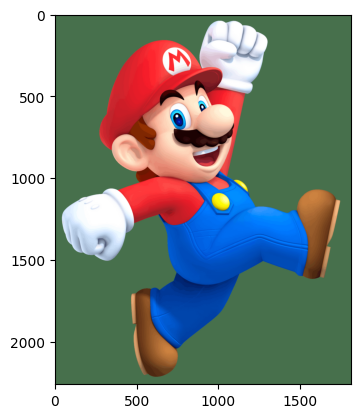

In [ ]:
# medianBlur()
# median(이미지, 커널)
dst = cv2.medianBlur(src, 3)
plt.imshow(dst)
# 노이즈가 심한 경우

In [ ]:
픽셀값 = [10, 20, 30, 200, 40]
print(f'평균 {np.mean(픽셀값)}') # 60
print(f'중앙 {np.median(픽셀값)}') # 30

평균 60.0
중앙 30.0


침식(erosion), 팽창(dilate), 열기(opening), 닫기(closing)

In [ ]:
image_path = '/content/drive/MyDrive/교육과정_두산로보틱스 로키 6기_250829/강의_4차_AI_Computer_Vision_응용_251120/1차시_OpenCV 영상정규화 및  Object Detecion 입문/salt.png'

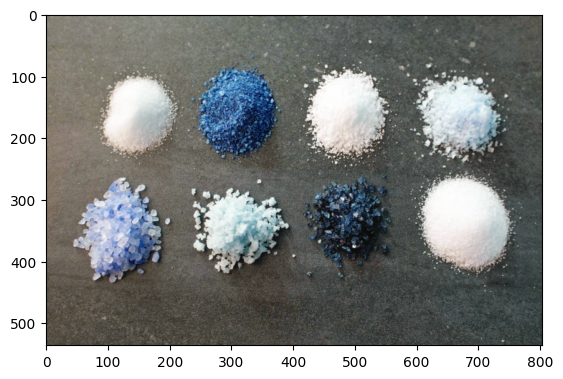

In [ ]:
src = cv2.imread(image_path)
plt.imshow(src)

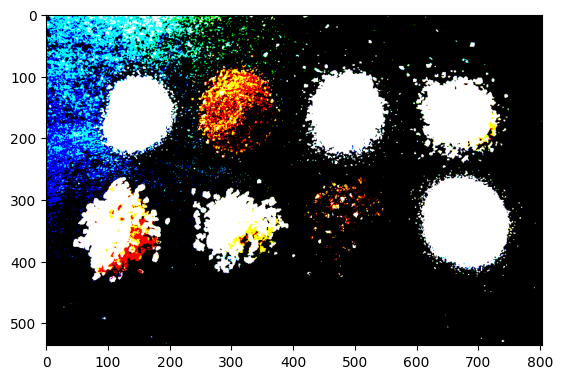

In [ ]:
# cv2.threshold
# 이미지 이진화(흑백변환)
# retval, dst = cv2.threshold(image, thresh, maxval 255, type)
result, binary_img = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)

# plt.imshow(binary_img)
plt.imshow(cv2.cvtColor(binary_img, cv2.COLOR_BGR2RGB), cmap ='gray')

팽창과 침식
- erosion
    - 흰색 영역(255)의 외곽을 깍아내는 연산
    - 커널이 완전히 흰색을 포함하는 영역만 유지, 나머지는 검정(0)으로 바꿈
    - 객체 작아짐(외곽이 깍여서), 작은 노이즈(작은 점 형태) 제거
- dilation
    - 흰색 영역 넓힘
    - 커널이 1개라도 흰색 만나면 중심 픽셀을 흰색으로 확장
    - 객체 커짐(빈 공간 채워줌). 끊긴 선 연결(문자, 윤곽선). 구멍 채워줌

실무 Tip
1. Binary(0-255)
2. erosion(줄어들고, 잡음 제거) 또는 dialation(커짐, 끊김 영역 연결)

- 일반적으로 외부 노이즈가 문제면, opening 사용
- 내부 구멍이 문제면 closing 사용
- 둘 다 문제면 opening 사용 후, closing

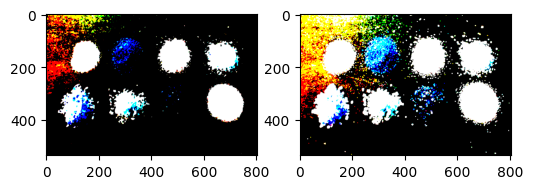

In [ ]:
# 커널 만들기
# np.empty(사이즈), np.zeros(사이즈)
# >> 사이즈 크기만큼 비어있는 객체 생성 / 사이즈 크기만큼 0으로 채워진 객체 생성
kernel = np.ones((3,3), np.uint8)

# cv2
erode_image = cv2.erode(binary_img, kernel, iterations=1)
dilate_image = cv2.dilate(binary_img, kernel, iterations=1)

fig, axes = plt.subplots(1,2,figsize=(6,3))

axes[0].imshow(erode_image)
axes[1].imshow(dilate_image)

plt.show()

- opening = erosion >> dilation
    - noise 제거 후 모형 유지
- closing = dilation >> erosion
    - 끊긴 윤곽선 연결

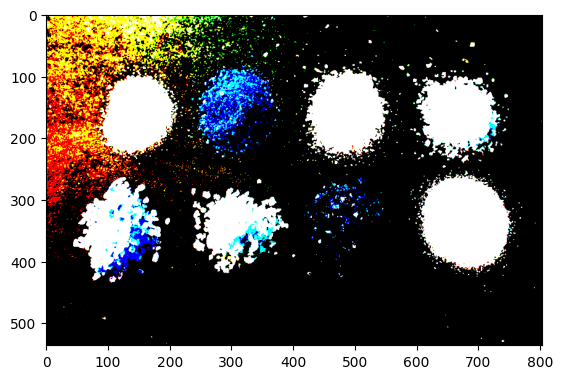

In [ ]:
# 이진화(binary) : 0 아니면 1 (흑백)
# 임계값(기준) 넘으면 255, 모자라면 0
# cv2.threshold(이미지, 임계값, 기준을 넘으면 255 만들기)
result, binary_image = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image)

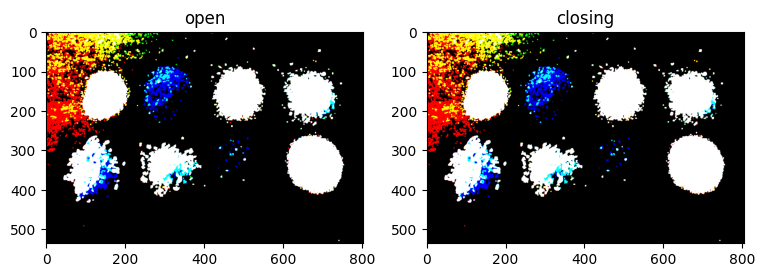

In [ ]:
kernel = np.ones((3,3), np.uint8)

opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

fig, axes = plt.subplots(1, 2, figsize=(9,3))

axes[0].imshow(opening)
axes[0].set_title('open')
axes[1].imshow(closing)
axes[1].set_title('closing')
# axes[2].imshow(closing)
# axes[2].set_title('close')
plt.show()